# Seaborn 
A statistical graphics library. See [Introduction](https://seaborn.pydata.org/tutorial/introduction.html)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context="paper", style="darkgrid")
# List all available datasets
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# Experimenting with Diamonds dataset

Seaborn diamond dataset has approximately 54K data for price and various diamond physical parameters.

 - carat: Weight of the diamond (0.2 - 5.01).
 - cut: Quality of the cut (Fair, Good, Very Good, Premium, Ideal).
 - color: Diamond color, from J (worst) to D (best).
 - clarity: Measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
 - depth: Total depth percentage (43-79).
 - table: Width of the top of the diamond relative to the widest point (43-95).
 - price: Price in US dollars (\$326 - \$18,823).
 - x: Length in mm (0-10.74).
 - y: Width in mm (0-58.9).
 - z: Depth in mm (0-31.8).

 This exercise will use seabron to understand and anlyze the dataset.


In [2]:
# download a dataset
data = sns.load_dataset('diamonds')

# Calculate diamon volume using two different ways:
# v1: (x + y) * depth * x * y / 200
# v2: x * y * z
data["v1"] = (data["x"] + data["y"]) * data["depth"] * data["x"] * data["y"] / 200.0
data["v2"] = data["x"] * data["y"] * data["z"]
smaller_diamonds = data[data["v1"] < 1_000]
print(data.columns)
print(data.head(2))
print(data.shape)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'v1', 'v2'],
      dtype='object')
   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   

          v1         v2  
0  38.335265  38.202030  
1  34.524827  34.505856  
(53940, 12)


# Understanding Data
## How far off are two volumes
The volumes calculates using two methods should be similar

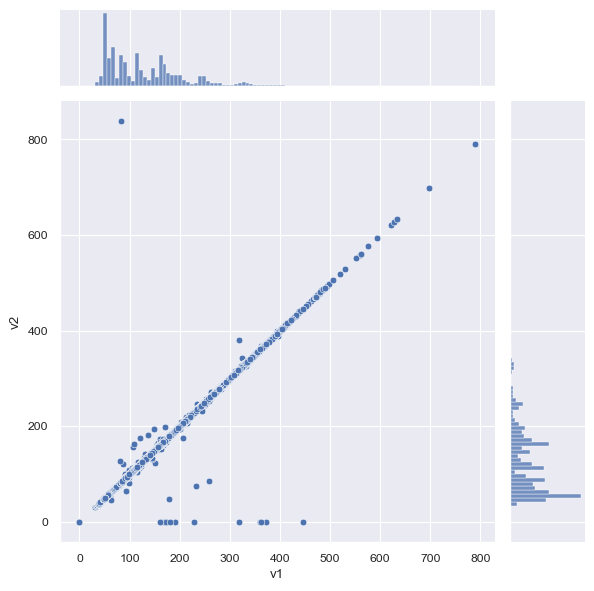

In [3]:
# Compare the two volume calculations
sns.jointplot(data=smaller_diamonds, x="v1", y="v2", kind="scatter",
              marginal_kws=dict(bins=100, fill=True))

In [4]:
data[["v1", "v2"]].corr()

,v1,v2
v1,1.000000,0.959206
v2,0.959206,1.000000


# Univariate Analysis

Looking at vdistibution of various types.

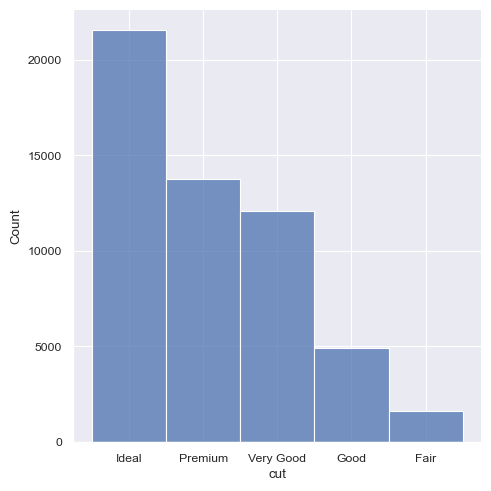

In [5]:
# Cut
sns.displot(data=smaller_diamonds, x="cut")

/Users/xyz-ai/Developer/python3-code/learn-python/.venv/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/xyz-ai/Developer/python3-code/learn-python/.venv/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/xyz-ai/Developer/python3-code/learn-python/.venv/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/xyz-ai/Developer/python3-code/learn-python/.venv/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of 

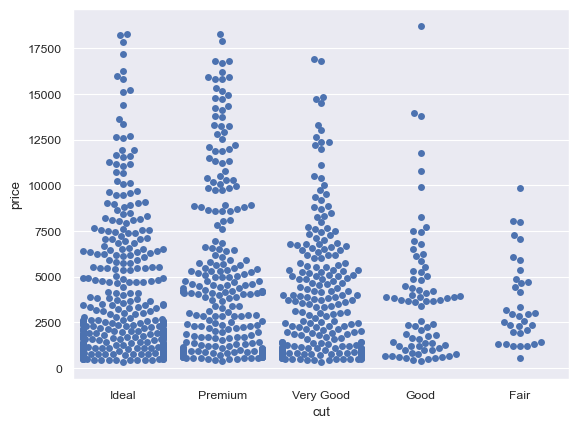

In [9]:
swarm = sns.swarmplot(data=smaller_diamonds.sample(1_000), x="cut", y="price")

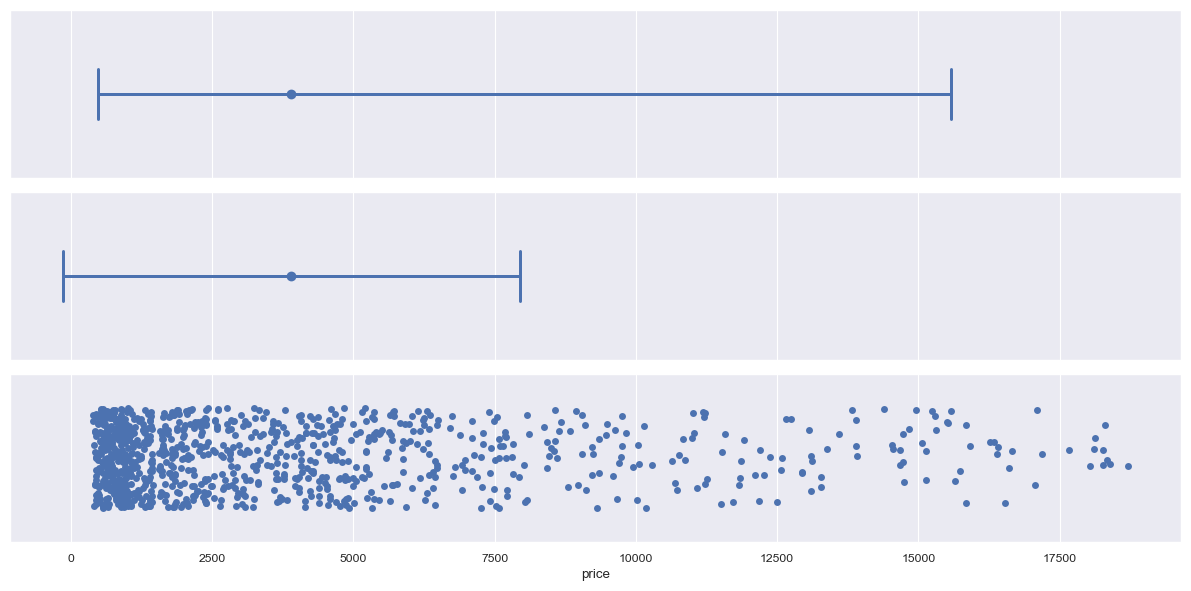

In [26]:
# Color
f, axs = plt.subplots(3, figsize=(12, 6), layout="tight", sharex=True)
sd1000 = smaller_diamonds.sample(1_000)
sns.pointplot(data=sd1000, x="price",
              errorbar="pi", ax=axs[0], capsize=.3)
sns.pointplot(data=sd1000, x="price",
              errorbar="sd", ax=axs[1], capsize=.3)
sns.stripplot(data=sd1000, x="price", jitter=0.3, ax=axs[2])
plt.show()

<Axes: xlabel='v1', ylabel='Count'>

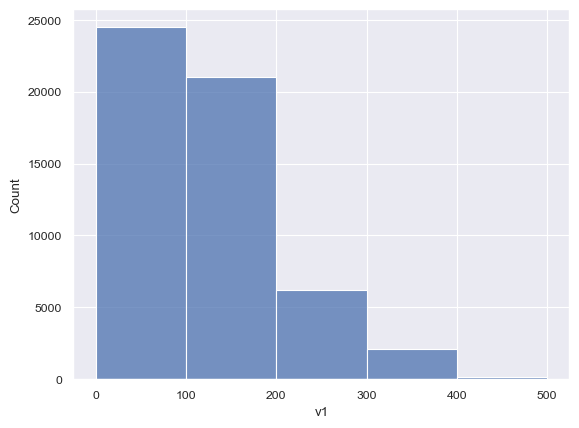

In [27]:
# Volume
sns.histplot(data=smaller_diamonds, x="v1",
             bins=[0, 100, 200, 300, 400, 500])

In [ ]:
sns.displot(data=data, x="price", kind="kde")

In [ ]:
sns.displot(data=data, x="price", bins=20, kde=True)

In [ ]:
# Compare cut and price
s = sns.displot(data=smaller_diamonds, x="cut", y="price")

In [ ]:
# Compare cut and price
sns.displot(data=data, x="cut", y="price")
plt.show()

In [ ]:
# Swarm plot - took 68 seconds to run
sns.swarmplot(data=smaller_diamonds, x="cut", y="price")

In [ ]:
# Show a cross-tabulation of two categorical variables

In [ ]:
sns.countplot(data=data, x="color", hue="cut")
plt.title("Count of diamonds by color and cut")
plt.show()

In [ ]:
s = sns.catplot(data=data, x="color", hue="cut", kind="count")
plt.title("Count of diamonds by color and cut")
plt.show()

In [ ]:
# Compare prices of diamonds with different volume
sns.displot(data=smaller_diamonds, x="v1", y="price", kind="kde", rug=True, hue="cut")
plt.title("Price of diamonds with volume < 1000")
plt.show()

In [ ]:
# Compare prices of diamonds with different color
sns.relplot(data=smaller_diamonds, x="v1", y="price",
            hue="color",
            height=4, aspect=1.5,
            kind="scatter")

In [ ]:
# Compare prices of color and sizes
sns.relplot(data=smaller_diamonds, x="color", y="v1",
            hue="cut",
            height=4, aspect=1.5,
            kind="scatter")

In [ ]:
# Compare prices of color and price
sns.relplot(data=smaller_diamonds, x="color", y="price",
            hue="color",
            height=4, aspect=1.5,
            kind="scatter")

In [ ]:
# Compare prices of color and price
sns.pairplot(data=smaller_diamonds[["price", "v1", "cut", "color", "carat", "clarity"]])